# 1. Dataset Information
Kumpulan data ini berasal dari DQLab, Anda dapat menemukannya di sini: [Data Analyst Project Business Decision Research](https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/data_retail.csv).
<br><br>
Dataset ini digunakan untuk melakukan churn analysis terhadap produk di salah satu cabang. Harapannya adalah bisa memberikan rekomendasi dan strategi untuk menurunkan churn dari pelanggan
<br><br>
catatan dari awal pengerjaan hingga selesai agar lebih sistematis:
<br><br>
**Catatan Awal-Selesai**
- Data preparation test
  - `Importing data` - Melakukan import data_retail.csv ke python environment
  - `Cleansing data` - Melakukan pembersihan dan modifikasi data sehingga siap digunakan untuk analisis lebih lanjut


- Data visualization test : Mendapatkan insight dari hasil visualisasi yang telah dibuat

- Basic stats method test : Mendapatkan insight dari model dan evaluasi model yang sudah dibuat dan diuji
  


# 2. Importing Libraries



In [ ]:
!pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install inflection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# basic
import pandas as pd
import numpy as np

# viz
import matplotlib.pyplot as plt
import seaborn as sns

# oversampling
from imblearn.over_sampling import SMOTE

# train test split
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

# 3. Data Preparation

**Importing Data And Inspection**
Importlah dataset dan kemudian inspeksilah dataset tersebut dengan
- `Mencetak lima data teratas saja`
- `Mencetak info dataset`

**Data Cleansing**
Dua kolom yang menunjukkan terjadinya transaksi tidak bertipe datetime, maka ubahlah kedua kolom tersebut ke tipe data datetime. Kemudian cetaklah kembali 5 data teratas dari dataframe df dan juga tipe data masing-masing kolomnya



In [ ]:
#Data Importing & Inspection
df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/data_retail.csv', sep=';')

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

Lima data teratas:
   no  Row_Num  Customer_ID Product  First_Transaction  Last_Transaction  \
0   1        1        29531   Jaket      1466304274396     1538718482608   
1   2        2        29531  Sepatu      1406077331494     1545735761270   
2   3        3       141526     Tas      1493349147000     1548322802000   
3   4        4       141526   Jaket      1493362372547     1547643603911   
4   5        5        37545  Sepatu      1429178498531     1542891221530   

   Average_Transaction_Amount  Count_Transaction  
0                     1467681                 22  
1                     1269337                 41  
2                      310915                 30  
3                      722632                 27  
4                     1775036                 25  

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      ----

In [ ]:
# Data Cleansing
# Kolom First_Transaction
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
# Kolom Last_Transaction
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())



Lima data teratas:
   no  Row_Num  Customer_ID Product             First_Transaction  \
0   1        1        29531   Jaket 2016-06-19 02:44:34.396000000   
1   2        2        29531  Sepatu 2014-07-23 01:02:11.493999872   
2   3        3       141526     Tas 2017-04-28 03:12:27.000000000   
3   4        4       141526   Jaket 2017-04-28 06:52:52.546999808   
4   5        5        37545  Sepatu 2015-04-16 10:01:38.530999808   

               Last_Transaction  Average_Transaction_Amount  Count_Transaction  
0 2018-10-05 05:48:02.608000000                     1467681                 22  
1 2018-12-25 11:02:41.269999872                     1269337                 41  
2 2019-01-24 09:40:02.000000000                      310915                 30  
3 2019-01-16 13:00:03.911000064                      722632                 27  
4 2018-11-22 12:53:41.529999872                     1775036                 25  

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries,

## Churn Customers
    Note: Customer churn, juga dikenal sebagai atrisi pelanggan, adalah persentase pelanggan yang berhenti menggunakan produk dan layanan bisnis selama jangka waktu tertentu
<br><br>
Untuk menentukan churn customers sesuai definisi yang telah diberikan, carilah
<br><br>
- transaksi paling terakhir kapan dilakukan
- klasifikasikanlah mana customer yang berstatus churn dan mana yang tidak.
<br><br>
Setelah itu cetak lima data teratas dan informasi dataset
Untuk menentukan churn customers dari data dapat dilakukan sebagai berikut:


In [ ]:
# Pengecekan transaksaksi terakhir dalam dataset
print(max(df['Last_Transaction']))

# Klasifikasikan customer yang berstatus churn atau tidak
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

2019-02-01 23:57:57.286000128
Lima data teratas:
   no  Row_Num  Customer_ID Product             First_Transaction  \
0   1        1        29531   Jaket 2016-06-19 02:44:34.396000000   
1   2        2        29531  Sepatu 2014-07-23 01:02:11.493999872   
2   3        3       141526     Tas 2017-04-28 03:12:27.000000000   
3   4        4       141526   Jaket 2017-04-28 06:52:52.546999808   
4   5        5        37545  Sepatu 2015-04-16 10:01:38.530999808   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000000                     1467681   
1 2018-12-25 11:02:41.269999872                     1269337   
2 2019-01-24 09:40:02.000000000                      310915   
3 2019-01-16 13:00:03.911000064                      722632   
4 2018-11-22 12:53:41.529999872                     1775036   

   Count_Transaction is_churn  
0                 22    False  
1                 41    False  
2                 30    False  
3                 27    False

## Menghapus kolom yang tidak diperlukan
Selanjutnya, kita akan menghapus kolom yang tidak diperlukan yaitu kolom ‘no’ dan ‘Row_Num’

In [ ]:
# Hapus kolom-kolom yang tidak diperlukan
del df['no']
del df['Row_Num']

# Cetak lima data teratas
print(df.head())
     


   Customer_ID Product             First_Transaction  \
0        29531   Jaket 2016-06-19 02:44:34.396000000   
1        29531  Sepatu 2014-07-23 01:02:11.493999872   
2       141526     Tas 2017-04-28 03:12:27.000000000   
3       141526   Jaket 2017-04-28 06:52:52.546999808   
4        37545  Sepatu 2015-04-16 10:01:38.530999808   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000000                     1467681   
1 2018-12-25 11:02:41.269999872                     1269337   
2 2019-01-24 09:40:02.000000000                      310915   
3 2019-01-16 13:00:03.911000064                      722632   
4 2018-11-22 12:53:41.529999872                     1775036   

   Count_Transaction is_churn  
0                 22    False  
1                 41    False  
2                 30    False  
3                 27    False  
4                 25    False  


# 4. Data Visualization



## Customer acquisition by year

Setelah semuanya lancar, langkah berikutnya adalah membuat visualisasi data berupa trend of customer acquisition by year dengan meggunakan bar chart. Untuk itu buatlah feature/kolom tambahan yang merupakan tahun dari First_Transaction dan tahun dari Last_Transaction masing-masingnya dengan nama Year_First_Transaction dan Year_Last_Transaction sebelum melakukan visualisasi.

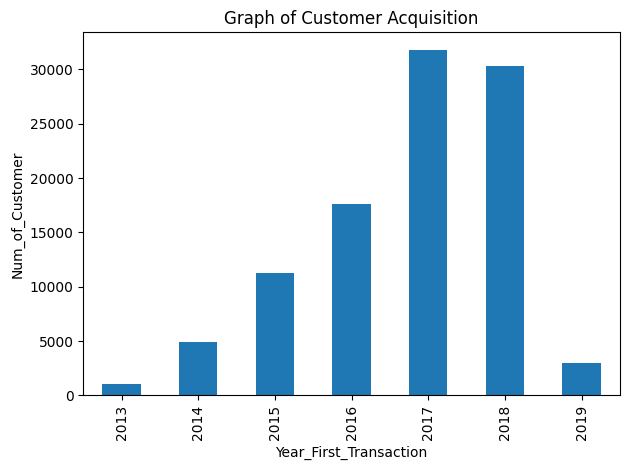

In [ ]:
# Kolom tahun transaksi pertama
df['Year_First_Transaction'] = df['First_Transaction'].dt.year

# Kolom tahun transaksi terakhir
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year
df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

- Seperti namanya, customer acquisition adalah proses penarikan pelanggan ke layanan yang kamu tawarkan. Proses ini sangat berguna, terutama untuk perkembangan bisnismu dalam jangka panjang.

- Berdasarkan visualisasi bar chart, dapat disimpulkan bahwa number of customer tertinggi diraih pada tahun 2017 sebesar 30000. Sedangkan yang memiliki number of customer terendah terjadi pada tahun 2013.



## Transaction Customer by Year

Visualisasikanlah trend jumlah transaksi per tahunnya dengan menggunakan bar chart.


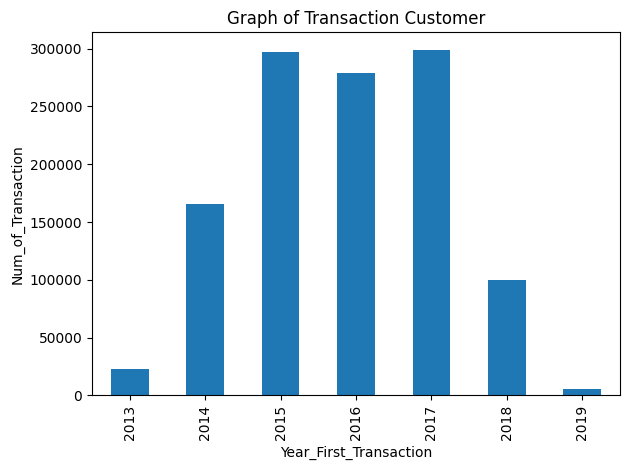

In [ ]:
plt.clf()
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()



  Berdasarkan visualisasi bar chart, number of customer sejalan dengan number of transaction. Hal ini terlihat pada tahun 2017 yakni sama sama meningkat baik transaksi maupun konsumennya. Hal serupa juga dialami dan terjadi pada tahun 2015 sebelumnya.



**Average transaction amount by year** 

Dengan menggunakan seaborn pointplot, visualisasikanlah tren dari tahun ke tahun rata-rata jumlah transaksi untuk tiap-tiap produknya.

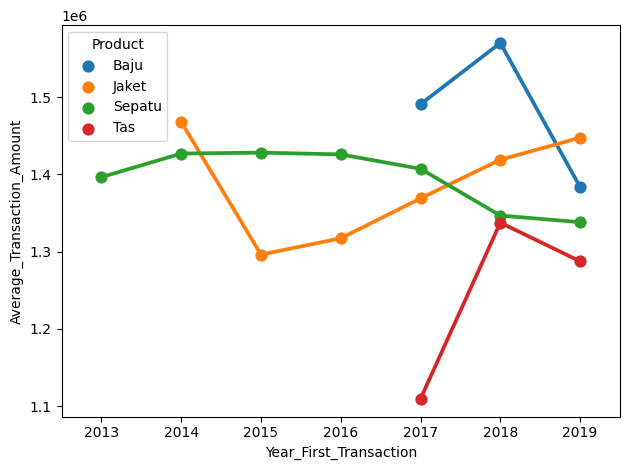

In [ ]:
plt.clf()
sns.pointplot(data = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(),
			  x='Year_First_Transaction',
			  y='Average_Transaction_Amount',
			  hue='Product')
plt.tight_layout()
plt.show()

  Berdasarkan rata-rata transaksi, beberapa produk mengalami kecenderungan naik-turun. Namun juga konstan seperti produk sepatu

## Proporsi churned customer untuk setiap produk
Dari sisi churned customer, khususnya untuk melihat seberapa besar proporsi churned customer untuk tiap-tiap produk dapat diketahui insight-nya melalui pie chart. Visualisasikan pie chartnya untuk keempat produk yang dimaksudkan.

<Figure size 640x480 with 0 Axes>

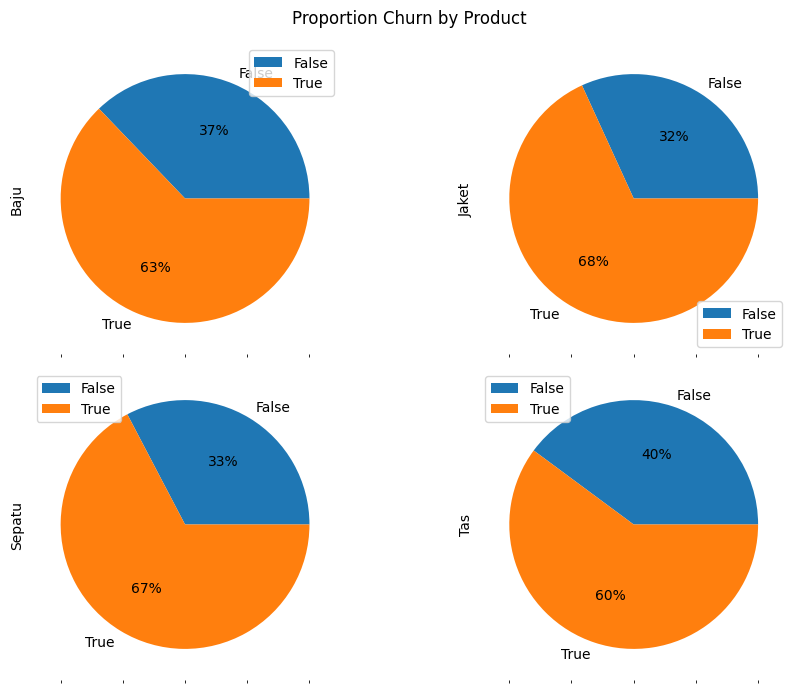

In [ ]:
plt.clf()

# Melakukan pivot data
df_piv = df.pivot_table(index='is_churn',
						columns='Product',
						values='Customer_ID',
						aggfunc='count',
						fill_value=0)

# Mendapatkan Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index

# Plot pie chartnya
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
				figsize=(10, 7),
				layout=(-1, 2),
				autopct='%1.0f%%',
				title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

Berdasarkan visualisasi pie chart, seperti yang telah kita jelaskan sebelumnya bahwa logika False (bukan customer churn) dan logika True yang artinya tergolong customer churn. Terlihat bahwa hampir keseluruhan produk memiliki customer churn. Artinya adalah konsumen sudah mulai berhenti untuk menggunakan layanan atau menghentikan pembeliannya (sudah bukan pelanggan). Rentang customer churn keseluruhan produk berkisar 60–68%. Kira-kira apa penyebabnya ya? Hal ini diakibatkan konsumen sudah agak sedikit beralih ke produk lain.

Alasan utama mengapa customer churn rate penting adalah persentase pelanggan yang hilang tersebut sangat memengaruhi growth rate perusahaan. Memperoleh pelanggan baru secara umum akan lebih mahal 5–25 kali lipat jika dibandingkan dengan mempertahankan mereka yang sudah ada. 

Solusi yang bisa dilakukan: kita bisa memanfaatkan 32–40% yang tergolong kedalam bukan customer churn untuk fokus kepada pelanggan setia produk Sport Center dengan memfokuskan tenaga, biaya, dan juga waktu pada pelanggan yang sudah terbukti setia


## Count Transaction Group
Distribusi kategorisasi count transaction
Selanjutnya akan melakukan visualisasi dari distribusi kategorisasi count transaction. Kategorisasi ini dilakukan dengan mengelompokkan jumlah transaksi seperti yang diperlihatkan oleh tabel berikut:

Rentang jumlah transaksi Kategori
s/d 1 1. 1

2 s/d 3 2. 2 - 3

4 s/d 6 3. 4 - 6

7 s/d 10 4. 7 - 10

10 5. > 10
<br><br>
Setelah menambahkan kolom baru untuk kategori ini dengan nama Count_Transaction_Group, maka visualisasikanlah dengan bar chart.


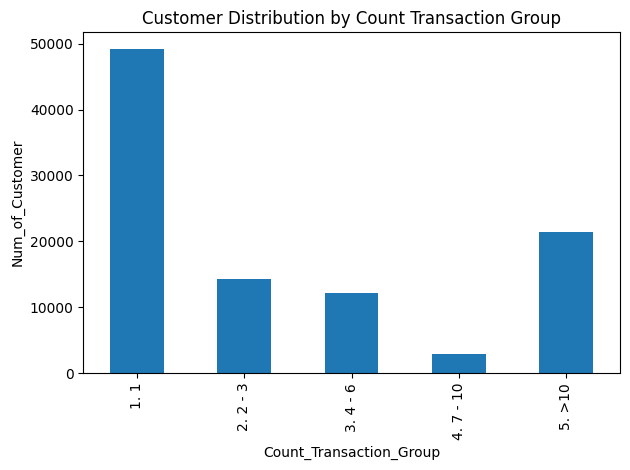

In [ ]:
plt.clf()
# Kategorisasi jumlah transaksi
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1. 1'
    elif (row['Count_Transaction'] >1 and row['Count_Transaction'] <= 3):
        val ='2. 2 - 3'
    elif (row['Count_Transaction'] >3 and row['Count_Transaction'] <= 6):
        val ='3. 4 - 6'
    elif (row['Count_Transaction'] >6 and row['Count_Transaction'] <= 10):
        val ='4. 7 - 10'
    else:
        val ='5. >10'
    return val
# Tambahkan kolom baru
df['Count_Transaction_Group'] = df.apply(func, axis=1)

df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

Setelah diketahui melalui visualisasi bar chart dalam distribusi kategori transaksi yang dilakukan, ternyata jumlah transaksi mereka hanya terjadi sekali (paling dominan). Sedangkan yang terendah adalah konsumen yang melakukan transaksi 7–10 kali dalam pembeliannya


## Average Transaction Amount
Distribusi kategorisasi average transaction amount
Selanjutnya, akan melakukan visualisasi dari distribusi kategorisasi average transaction amount. Kategorisasi ini dilakukan dengan mengelompokkan rata-rata besar transaksi seperti yang diperlihatkan oleh tabel berikut:

Rentang rata-rata besar transaksi Kategori 
<br><br>
100.000 s/d 200.000 1. 100.000 - 250.000
250.000 s/d 500.000 2. >250.000 - 500.000

500.000 s/d 750.000 3. >500.000 - 750.000

750.000 s/d 1.000.000 4. >750.000 - 1.000.000

1.000.000 s/d 2.500.000 5. >1.000.000 - 2.500.000

2.500.000 s/d 5.000.000 6. >2.500.000 - 5.000.000

5.000.000 s/d 10.000.000 7. >5.000.000 - 10.000.000

10.000.000 8. >10.000.000
<br><br>
Setelah ditambahkan kolom baru untuk kategori ini dengan nama Average_Transaction_Amount_Group, maka visualisasikanlah dengan bar chart.


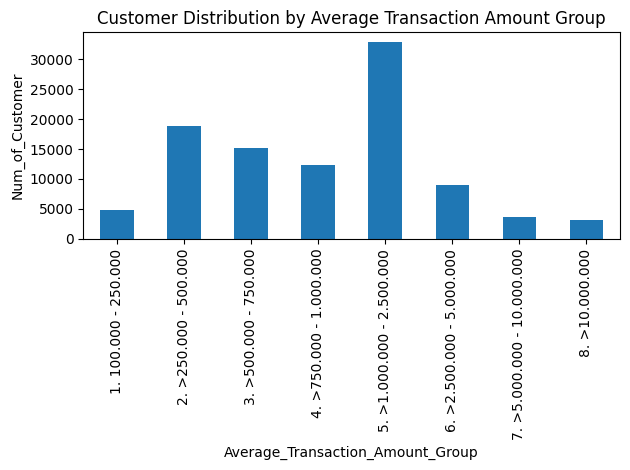

In [ ]:
plt.clf()
# Kategorisasi rata-rata besar transaksi
def f(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <=200000):
        val ='1. 100.000 - 250.000'
    elif (row['Average_Transaction_Amount'] >250000 and row['Average_Transaction_Amount'] <= 500000):
        val ='2. >250.000 - 500.000'
    elif (row['Average_Transaction_Amount'] >500000 and row['Average_Transaction_Amount'] <= 750000):
        val ='3. >500.000 - 750.000'
    elif (row['Average_Transaction_Amount'] >750000 and row['Average_Transaction_Amount'] <= 1000000):
        val ='4. >750.000 - 1.000.000'
    elif (row['Average_Transaction_Amount'] >1000000 and row['Average_Transaction_Amount'] <= 2500000):
        val ='5. >1.000.000 - 2.500.000'
    elif (row['Average_Transaction_Amount'] >2500000 and row['Average_Transaction_Amount'] <= 5000000):
        val ='6. >2.500.000 - 5.000.000'
    elif (row['Average_Transaction_Amount'] >5000000 and row['Average_Transaction_Amount'] <= 10000000):
        val ='7. >5.000.000 - 10.000.000'
    else:
        val ='8. >10.000.000'
    return val

# Tambahkan kolom baru
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)

df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID',kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

Berdasarkan output visualisasi bar chart, rata-rata besar transaksi terjadi pada rentang angka > 1.000.000 hingga 2.500.000.

Kemudian, untuk memudahkan dalam pengambilan keputusan kita bisa menggunakan syntax df[‘is_churn’] untuk mengklasifikasikan manakah customer yang termasuk customer churn atau tidak dengan logika ‘TRUE’ and ‘FALSE’
TRUE = konsumen yang melakukan transaksi terakhir kurang dari tanggal 01 Agustus 2018
FALSE = konsumen yang melakukan transaksi terakhir lebih dari tanggal 01 Agustus 2018
<br><br>


# 5. Modeling (Stat Method)

**Feature Columns dan Target**
- Di bagian ini, selanjutnya akan menentukan feature columns dari dataset yang dimiliki, di sini dipilih kolom Average_Transaction_Amount, Count_Transaction, dan Year_Diff. Akan tetapi, kolom terakhir belum ada. Silakan dicreate dahulu kolom Year_Diff ini dan kemudian assign dataset dengan feature columns ini sebagai variabel independent X.

- Untuk target tentunya persoalan costumer dengan kondisi churn atau tidak, assign dataset untuk target ini ke dalam variabe dependent y.
<br><br>

**Mengubah value kolom is_churn menjadi numerik**
- Untuk lebih memudahkan mana yang tergolong customer churn atau tidak, kita bisa mengubah value kolom is_churn menjadi nilai numerik 
- Hal ini dilakukan agar nantinya ketika masuk ke bagian Data Visualization dapat mengetahui proporsi customer churn setiap kategori produknya.


In [ ]:
# Feature column: Year_Diff
df['Year_Diff'] = df['Year_Last_Transaction'] - df['Year_First_Transaction']# Nama-nama feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']# Features variable
X = df[feature_columns]

# Target variable
# Mengubah is_churn menjadi numerik
y = df['is_churn'] 
y=y.astype('int')


print('Kolom Feature', X)
print('\nKolom Target', y)

Kolom Feature        Average_Transaction_Amount  Count_Transaction  Year_Diff
0                         1467681                 22          2
1                         1269337                 41          4
2                          310915                 30          2
3                          722632                 27          2
4                         1775036                 25          3
...                           ...                ...        ...
99995                      298662                  1          0
99996                      349556                  1          0
99997                      598013                  1          0
99998                     1208591                  1          0
99999                      486710                  1          0

[100000 rows x 3 columns]

Kolom Target 0        0
1        0
2        0
3        0
4        0
        ..
99995    1
99996    1
99997    1
99998    1
99999    0
Name: is_churn, Length: 100000, dtype: int64


In [ ]:
df['is_churn']

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996     True
99997     True
99998     True
99999    False
Name: is_churn, Length: 100000, dtype: object



Split X dan y ke dalam bagian training dan testing
Setelah variabel independent X dan variabel dependent y selesai dilakukan, maka pecahlah X dan y ke dalam bagian training dan testing. Bagian testing 25% dari jumlah entri data.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Train, Predict dan Evaluate

Langkah selanjutnya akan membuat model menggunakan Linear Regression, inisialisasilah model, fit, dan kemudian evaluasi model dengan menggunakan confusion matrix.


## Logistic Regression

In [ ]:
# Inisiasi model logreg
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

# Predict model
y_pred=logreg.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)
     

Confusion Matrix:
 [[    1  8330]
 [    3 16666]]




Visualisasi Confusion Matrix

Confusion matrix yang telah dihitung sebelumnya dapat divisualisasikan dengan menggunakan heatmap dari seaborn. Untuk itu tampilkanlah visualisasi dari confusion matrix ini.


<Figure size 640x480 with 0 Axes>

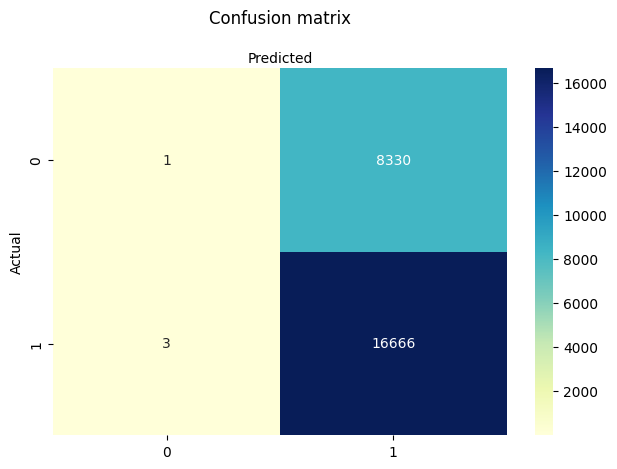

In [ ]:
plt.clf()
# name of classes
class_names = [0, 1]
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

Accuracy, Precision, dan Recall

Kemudian, hitunglah nilai accuracy, precission dan recall berdasarkan nilai target sesungguhnya dan nilai target hasil prediksi.


In [ ]:
#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall   :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.66668
Precision: 0.66668
Recall   : 0.66668


## DecisionTree

In [ ]:
# Inisiasi model dectre
dectre = DecisionTreeClassifier()

# fit the model with data
dectre.fit(X_train, y_train)

# Predict model
y_pred=dectre.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[ 4015  4316]
 [ 4351 12318]]



Visualisasi Confusion Matrix

Confusion matrix yang telah dihitung sebelumnya dapat divisualisasikan dengan menggunakan heatmap dari seaborn. Untuk itu tampilkanlah visualisasi dari confusion matrix ini.


<Figure size 640x480 with 0 Axes>

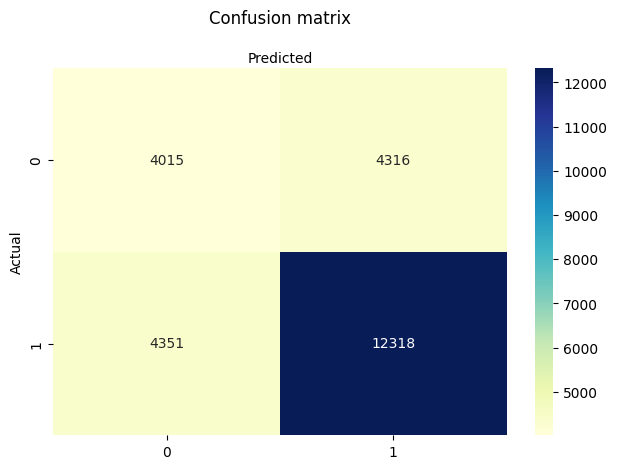

In [ ]:
plt.clf()
# name of classes
class_names = [0, 1]
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

Accuracy, Precision, dan Recall

Kemudian, hitunglah nilai accuracy, precission dan recall berdasarkan nilai target sesungguhnya dan nilai target hasil prediksi.

In [ ]:
#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall   :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.65332
Precision: 0.65332
Recall   : 0.65332


## RandomForest

In [ ]:
# Inisiasi model ranfor
ranfor = RandomForestClassifier()

# fit the model with data
ranfor.fit(X_train, y_train)

# Predict model
y_pred=ranfor.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[ 4175  4156]
 [ 4380 12289]]


Visualisasi Confusion Matrix

Confusion matrix yang telah dihitung sebelumnya dapat divisualisasikan dengan menggunakan heatmap dari seaborn. Untuk itu tampilkanlah visualisasi dari confusion matrix ini.


<Figure size 640x480 with 0 Axes>

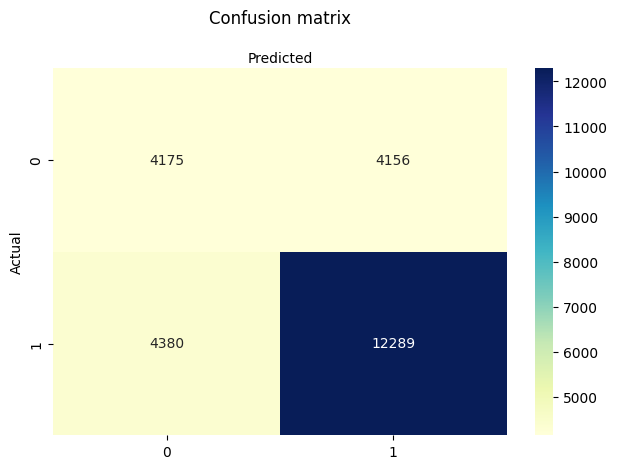

In [ ]:
plt.clf()
# name of classes
class_names = [0, 1]
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

Accuracy, Precision, dan Recall

Kemudian, hitunglah nilai accuracy, precission dan recall berdasarkan nilai target sesungguhnya dan nilai target hasil prediksi.

In [ ]:
#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall   :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.65856
Precision: 0.65856
Recall   : 0.65856


## KNeighbors

In [ ]:
# Inisiasi model knc
knc = KNeighborsClassifier()

# fit the model with data
knc.fit(X_train, y_train)

# Predict model
y_pred=knc.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[ 1892  6439]
 [ 3117 13552]]


Visualisasi Confusion Matrix

Confusion matrix yang telah dihitung sebelumnya dapat divisualisasikan dengan menggunakan heatmap dari seaborn. Untuk itu tampilkanlah visualisasi dari confusion matrix ini.


<Figure size 640x480 with 0 Axes>

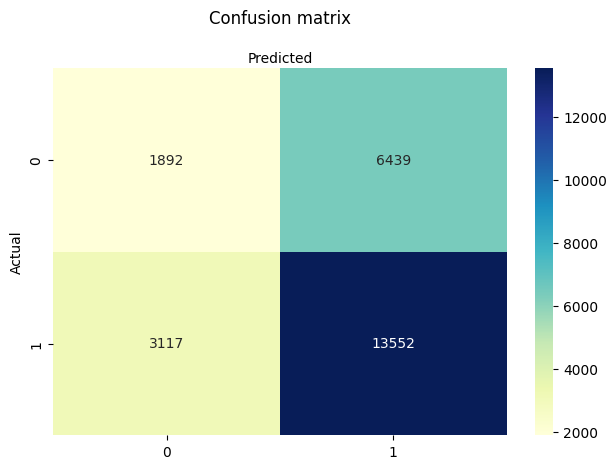

In [ ]:
plt.clf()
# name of classes
class_names = [0, 1]
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

Accuracy, Precision, dan Recall

Kemudian, hitunglah nilai accuracy, precission dan recall berdasarkan nilai target sesungguhnya dan nilai target hasil prediksi.

In [ ]:
#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall   :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.61776
Precision: 0.61776
Recall   : 0.61776


## Ridge

In [ ]:
# Inisiasi model rc
rc = RidgeClassifier()

# fit the model with data
rc.fit(X_train, y_train)

# Predict model
y_pred=rc.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[ 3109  5222]
 [  944 15725]]


Visualisasi Confusion Matrix

Confusion matrix yang telah dihitung sebelumnya dapat divisualisasikan dengan menggunakan heatmap dari seaborn. Untuk itu tampilkanlah visualisasi dari confusion matrix ini.


<Figure size 640x480 with 0 Axes>

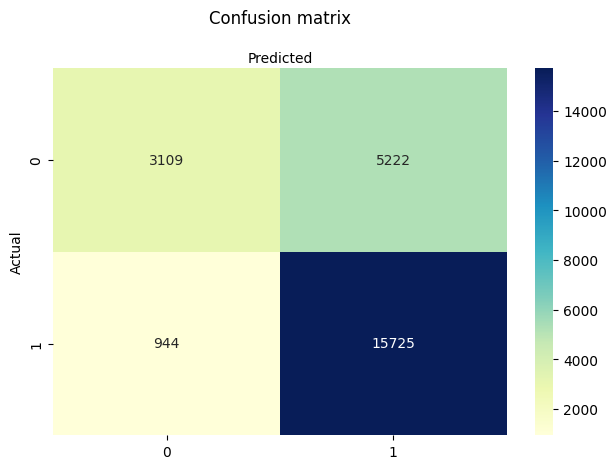

In [ ]:
plt.clf()
# name of classes
class_names = [0, 1]
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

Accuracy, Precision, dan Recall

Kemudian, hitunglah nilai accuracy, precission dan recall berdasarkan nilai target sesungguhnya dan nilai target hasil prediksi.

In [ ]:
#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall   :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.75336
Precision: 0.75336
Recall   : 0.75336


## AdaBoost

In [ ]:
# Inisiasi model abc
abc = AdaBoostClassifier()

# fit the model with data
abc.fit(X_train, y_train)

# Predict model
y_pred=abc.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[ 3807  4524]
 [ 1183 15486]]


Visualisasi Confusion Matrix

Confusion matrix yang telah dihitung sebelumnya dapat divisualisasikan dengan menggunakan heatmap dari seaborn. Untuk itu tampilkanlah visualisasi dari confusion matrix ini.

<Figure size 640x480 with 0 Axes>

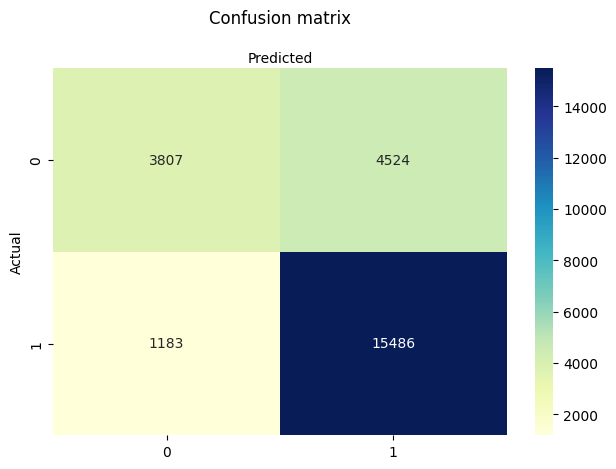

In [ ]:
plt.clf()
# name of classes
class_names = [0, 1]
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

Accuracy, Precision, dan Recall

Kemudian, hitunglah nilai accuracy, precission dan recall berdasarkan nilai target sesungguhnya dan nilai target hasil prediksi.

In [ ]:
#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall   :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.77172
Precision: 0.77172
Recall   : 0.77172


## GradientBoosting

In [ ]:
# Inisiasi model gbc
gbc = GradientBoostingClassifier()

# fit the model with data
gbc.fit(X_train, y_train)

# Predict model
y_pred=gbc.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[ 3765  4566]
 [ 1127 15542]]


Visualisasi Confusion Matrix

Confusion matrix yang telah dihitung sebelumnya dapat divisualisasikan dengan menggunakan heatmap dari seaborn. Untuk itu tampilkanlah visualisasi dari confusion matrix ini.

<Figure size 640x480 with 0 Axes>

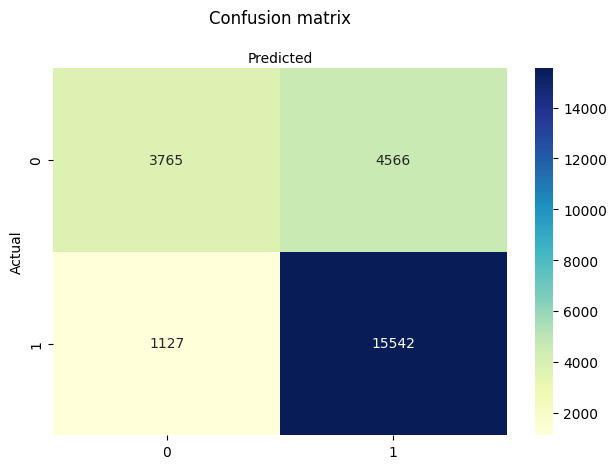

In [ ]:
plt.clf()
# name of classes
class_names = [0, 1]
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

Accuracy, Precision, dan Recall

Kemudian, hitunglah nilai accuracy, precission dan recall berdasarkan nilai target sesungguhnya dan nilai target hasil prediksi.

In [ ]:
#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall   :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.77228
Precision: 0.77228
Recall   : 0.77228


## HistGradientBoosting

In [ ]:
# Inisiasi model hgb
hgb = HistGradientBoostingClassifier()

# fit the model with data
hgb.fit(X_train, y_train)

# Predict model
y_pred=hgb.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[ 3773  4558]
 [ 1148 15521]]


Visualisasi Confusion Matrix

Confusion matrix yang telah dihitung sebelumnya dapat divisualisasikan dengan menggunakan heatmap dari seaborn. Untuk itu tampilkanlah visualisasi dari confusion matrix ini.

<Figure size 640x480 with 0 Axes>

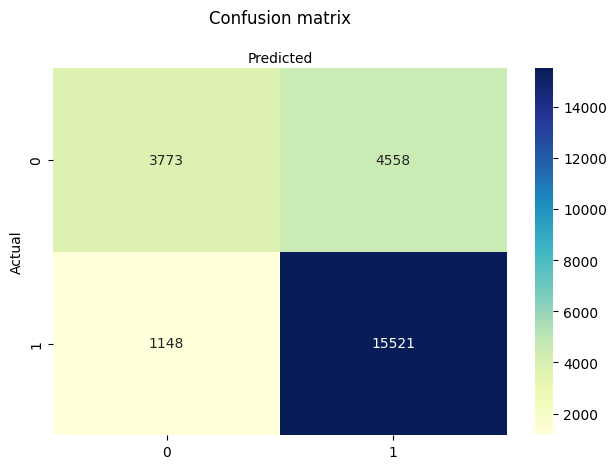

In [ ]:
plt.clf()
# name of classes
class_names = [0, 1]
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

Accuracy, Precision, dan Recall

Kemudian, hitunglah nilai accuracy, precission dan recall berdasarkan nilai target sesungguhnya dan nilai target hasil prediksi.

In [ ]:
#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall   :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.77176
Precision: 0.77176
Recall   : 0.77176


## MLP

In [ ]:
# Inisiasi model mlp
mlp = MLPClassifier()

# fit the model with data
mlp.fit(X_train, y_train)

# Predict model
y_pred=mlp.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[ 1434  6897]
 [  352 16317]]


Visualisasi Confusion Matrix

Confusion matrix yang telah dihitung sebelumnya dapat divisualisasikan dengan menggunakan heatmap dari seaborn. Untuk itu tampilkanlah visualisasi dari confusion matrix ini.

<Figure size 640x480 with 0 Axes>

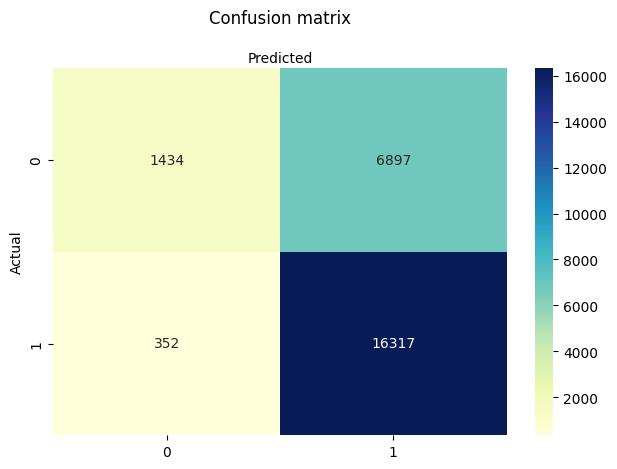

In [ ]:
plt.clf()
# name of classes
class_names = [0, 1]
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

Accuracy, Precision, dan Recall

Kemudian, hitunglah nilai accuracy, precission dan recall berdasarkan nilai target sesungguhnya dan nilai target hasil prediksi.

In [ ]:
#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall   :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.71004
Precision: 0.71004
Recall   : 0.71004


Note:

Menurut pengenalan pola (pattern recognition) dan temu kembali informasi (information retrieval) maka precision dan recall adalah dua perhitungan yang banyak digunakan untuk mengukur kinerja dari sistem / metode yang digunakan sedangkan precision adalah tingkat ketepatan antara informasi yang diminta oleh pengguna dengan jawaban yang diberikan oleh sistem. Sedangkan recall adalah tingkat keberhasilan sistem dalam menemukan kembali sebuah informasi.

Sedangkan dalam dunia statistika dikenal juga istilah accuray. Accuracy didefinisikan sebagai tingkat kedekatan antara nilai prediksi dengan nilai aktual. Ilustrasi berikut ini memberikan gambaran perbedaan antara accuracy dan precision.

kesimpulan : Dengan demikian, nilai precision, recall, dan accuracy memiliki nilai yang sama sehingga hasil dari beberapa modeling menunjukan modeling yang terbaik yaitu Gradientboosting dengan nilai sebesar 0.77228